# Day 17: Convolutional Neural Networks (CNNs) - Image Classification Mastery

**Welcome to Day 17 of your ML journey!** Today we dive into one of the most revolutionary architectures in deep learning: **Convolutional Neural Networks (CNNs)**. Building on your solid PyTorch foundation from Day 16, you'll now learn to build models that can "see" and understand images with superhuman accuracy.

---

**Goal:** Master CNN architecture and build production-ready image classification systems using PyTorch.

**Topics Covered:**
- CNN architecture: convolution, pooling, and feature learning
- Building CNNs from scratch with PyTorch
- Image preprocessing and data augmentation
- Training CNNs on MNIST and CIFAR-10 datasets
- Feature visualization and model interpretation
- Advanced techniques: batch normalization, dropout, residual connections
- Transfer learning fundamentals
- Real-world applications and industry best practices

**Real-World Impact:** CNNs power everything from medical diagnosis to autonomous vehicles, social media filters to security systems. By the end of today, you'll understand the technology behind these applications and be able to build your own image recognition systems.

**Prerequisites:** Solid understanding of PyTorch fundamentals (Day 16), neural network basics (Day 15), and Python programming.


---

## 1. Concept Overview: Understanding CNNs

### What are Convolutional Neural Networks?

**Convolutional Neural Networks (CNNs)** are specialized neural networks designed to process data with a grid-like topology, such as images. They're inspired by the visual cortex of animals and are exceptionally effective at recognizing patterns in visual data.

<div align="center">
    <img src="Images/Convolutional Neural Network.jpeg" alt="Convolutional Neural Network Architecture showing input layer, convolutional layers, pooling layers, and fully connected layers" width="600" height="400">
    <br>
    <em id="figure1">Figure 1: CNN Architecture - From input image through convolutional layers, pooling, and fully connected layers to final classification</em>
</div>

**The Core Intuition:**
Think of CNNs like a team of specialized detectives examining a crime scene photo. Each detective (filter) looks for specific clues (features) - one might focus on edges, another on textures, another on shapes. They work together to piece together the complete picture.

**Why CNNs Excel at Images:**
1. **Spatial Relationships**: Preserves the 2D structure of images
2. **Parameter Sharing**: Same filters applied across the entire image
3. **Translation Invariance**: Recognizes objects regardless of position
4. **Hierarchical Learning**: Low-level features → High-level concepts

**Real-World Applications:**
- **Medical Imaging**: Detecting tumors, analyzing X-rays, diagnosing diseases
- **Autonomous Vehicles**: Recognizing traffic signs, pedestrians, other vehicles
- **Social Media**: Face recognition, content moderation, photo enhancement
- **Security**: Surveillance systems, biometric authentication
- **E-commerce**: Product recognition, visual search, quality control


### CNN Building Blocks Explained

The diagram above (<a href="#figure1">Figure 1</a>) shows a complete CNN architecture in action. Let's walk through each component and see how they work together to process images:

#### 1. **Convolutional Layers** (The Feature Detectors)
As shown in the diagram, convolutional layers are the heart of CNNs. These layers apply filters (kernels) to detect features:

**How Convolution Works (Visualized in the diagram):**
- **Input Image**: The diagram shows a raw image entering the network
- **Filter Application**: Small filters (e.g., 3×3) slide across the image, as illustrated by the convolution operation
- **Feature Maps**: Each filter produces a feature map highlighting specific patterns
- **Multiple Filters**: Notice how different filters detect different features (edges, textures, patterns)

**Key Parameters (Visible in the architecture):**
- **Filter Size**: Typically 3×3 or 5×5 (larger = more context)
- **Stride**: How many pixels the filter moves (1 = every pixel, 2 = every other pixel)
- **Padding**: Adding zeros around the image to preserve size
- **Number of Filters**: More filters = more feature types detected (see the multiple feature maps in the diagram)

#### 2. **Activation Functions** (The Non-linearity Injectors)
Between convolutional layers, activation functions introduce non-linearity:
- **ReLU (Rectified Linear Unit)**: Most common, f(x) = max(0, x)
- **Leaky ReLU**: Fixes "dying ReLU" problem
- **ELU**: Smooth alternative with better gradient flow

*Note: In the diagram, activation functions are applied after each convolutional layer, though not explicitly shown.*

#### 3. **Pooling Layers** (The Dimension Reducers)
The diagram clearly shows pooling layers reducing spatial dimensions while preserving important information:
- **Max Pooling**: Takes maximum value in each region (most common) - visible as the downsampling in the diagram
- **Average Pooling**: Takes average value in each region
- **Benefits**: Reduces overfitting, computational cost, and parameters (notice how the feature maps get smaller)

#### 4. **Fully Connected Layers** (The Final Classifiers)
The diagram shows the transition from 2D feature maps to 1D vectors for final classification:
- **Flattening**: Feature maps are flattened into vectors (visible in the diagram)
- **Dense Layers**: Perform final classification or regression
- **Output**: Produces the final prediction (shown as the output layer)


### How Convolution Works: A Deep Dive

**The Convolution Operation:**
Convolution is a mathematical operation that combines two functions to produce a third function. In CNNs, we use discrete convolution:

<div style="background:rgb(10, 10, 7); border-left: 4px solid #667eea; padding: 20px; margin: 20px 0; border-radius: 8px;">
    <h4 style="color: #667eea; margin-top: 0;"> Mathematical Formula</h4>
    <div style="background: rgb(231, 231, 55); padding: 15px; border-radius: 5px; text-align: center; font-family: monospace; font-size: 16px; border: rgb(0, 0, 0);">
        <strong style="color: black;">Output[i,j] = Σ Σ Input[i+m, j+n] × Filter[m, n]</strong><br>
        <span style="color:rgb(56, 240, 56); font-size: 14px;">where m, n are filter dimensions</span>
    </div>
</div>

**Step-by-Step Process (<a href="#figure2">Figure 2</a>):**
1. **Place Filter**: Position the filter over a region of the input (red highlighted area)
2. **Element-wise Multiply**: Multiply corresponding elements (yellow calculation box)
3. **Sum Results**: Add all products together (shown in yellow box)
4. **Store Output**: Place result in corresponding position of output (feature map)
5. **Slide Filter**: Move filter to next position and repeat (sequential red highlights)

**Feature Detection Examples:**
- **Edge Detection**: Filters that detect horizontal, vertical, diagonal edges
- **Texture Detection**: Filters that identify patterns like wood grain, fabric
- **Shape Detection**: Filters that recognize circles, squares, triangles
- **Color Patterns**: Filters that detect specific color combinations

**Hierarchical Learning:**
- **Layer 1**: Detects edges, corners, basic shapes
- **Layer 2**: Combines edges into textures, simple shapes
- **Layer 3**: Recognizes object parts (eyes, wheels, doors)
- **Layer 4+**: Identifies complete objects (faces, cars, buildings)

<div align="center">
    <img src="Images/3×3 filter sliding across a 5×5 image.png" 
         alt="Step-by-step convolution demonstration showing 3x3 filter sliding across input image" 
         width="700" height="500">
    <br>
    <em id="figure2">Figure 2: Convolution Operation - 3×3 filter sliding across input with element-wise multiplication and summation</em>
</div>


### Pooling and Dimensionality Reduction

**Why Pooling is Essential:**
Pooling layers serve multiple critical purposes in CNNs:

1. **Dimensionality Reduction**: Reduces spatial size of feature maps
2. **Translation Invariance**: Makes the network robust to small shifts
3. **Computational Efficiency**: Reduces parameters and computation
4. **Overfitting Prevention**: Acts as a form of regularization

**Max Pooling (Most Common):**
- Takes the maximum value in each pooling region
- Preserves the strongest activation (most important feature)
- Commonly uses 2×2 pooling with stride 2
- Reduces spatial dimensions by half

**Average Pooling:**
- Takes the average value in each pooling region
- Smoother output, less sensitive to outliers
- Sometimes used in final layers for global pooling

**Global Pooling:**
- Reduces entire feature map to single value
- Global Average Pooling (GAP) popular in modern architectures
- Eliminates need for fully connected layers

**Spatial Invariance Benefits:**
- Object recognition regardless of exact position
- Robustness to small translations and rotations
- Better generalization to new data

<div align="center">
    <img src="Images/Max Pooling vs Average Pooling.png" 
         alt="Step-by-step convolution demonstration showing 3x3 filter sliding across input image" 
         width="700" height="500">
    <br>
    <em>Figure 2: Max Pooling Vs Average Pooling</em>
</div>



---

## 2. Code Demo: Building CNNs with PyTorch

Let's dive into practical implementation! We'll start with a simple CNN and progressively build more sophisticated architectures.


In [10]:
# Import essential libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets  # ← This line imports datasets

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm
import time

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Configure matplotlib
plt.style.use('default')
sns.set_palette("husl")

# Check PyTorch version and device availability
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA device: {torch.cuda.get_device_name(0)}")
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    print("Using CPU")

print(f"Device: {device}")

PyTorch version: 2.9.0+cpu
CUDA available: False
Using CPU
Device: cpu


### 2.2 Dataset Loading and Exploration

Let's start with the MNIST dataset - a classic benchmark for image classification. MNIST contains 70,000 grayscale images of handwritten digits (0-9), each 28×28 pixels.


In [11]:
import torchvision.transforms as transforms

# Define data transformations
# Convert PIL images to tensors and normalize pixel values to [0,1]
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL Image to tensor and scale to [0,1]
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1,1] range
])

# Load MNIST dataset
print("Loading MNIST dataset...")
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transform
)

test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    download=True, 
    transform=transform
)

# Create data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Classes: {train_dataset.classes}")


Loading MNIST dataset...


100%|██████████| 9.91M/9.91M [00:01<00:00, 8.15MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 175kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 291kB/s]


Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
Classes: ['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


Sample images from MNIST training set:


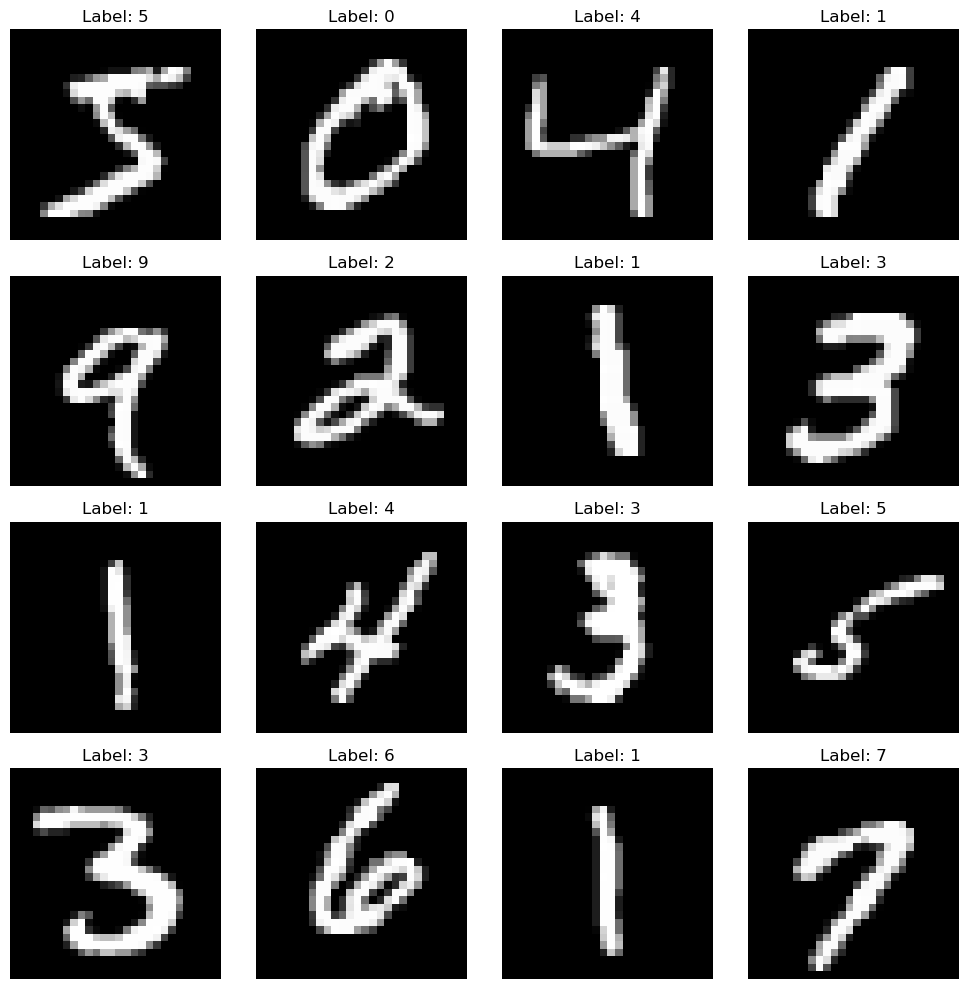

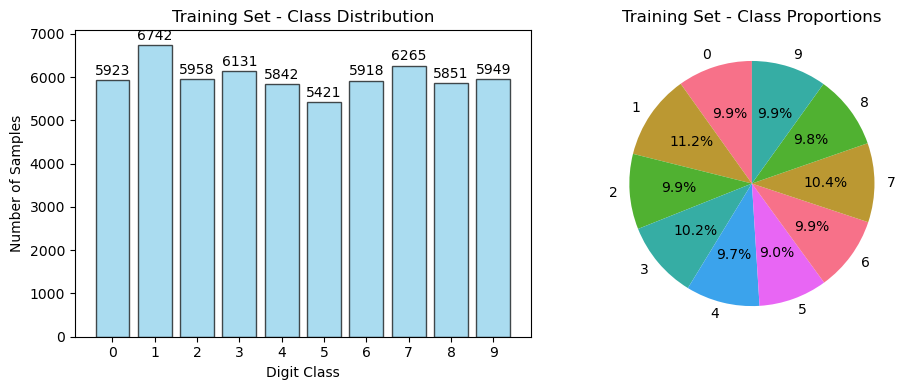


Training Set Statistics:
Digit 0: 5,923 samples (9.9%)
Digit 1: 6,742 samples (11.2%)
Digit 2: 5,958 samples (9.9%)
Digit 3: 6,131 samples (10.2%)
Digit 4: 5,842 samples (9.7%)
Digit 5: 5,421 samples (9.0%)
Digit 6: 5,918 samples (9.9%)
Digit 7: 6,265 samples (10.4%)
Digit 8: 5,851 samples (9.8%)
Digit 9: 5,949 samples (9.9%)


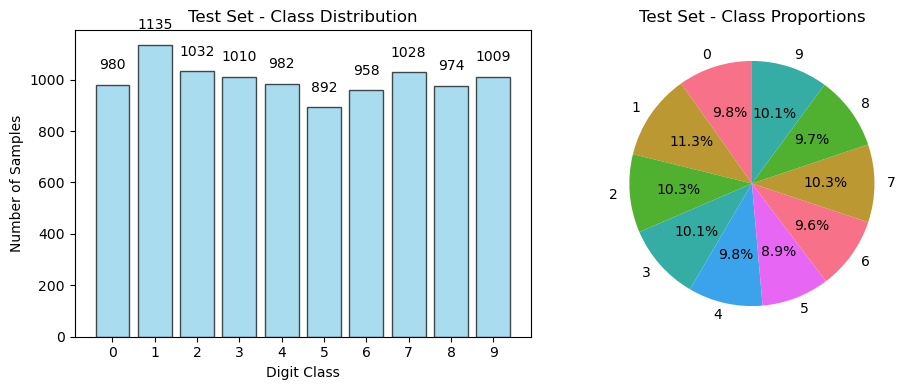


Test Set Statistics:
Digit 0: 980 samples (9.8%)
Digit 1: 1,135 samples (11.3%)
Digit 2: 1,032 samples (10.3%)
Digit 3: 1,010 samples (10.1%)
Digit 4: 982 samples (9.8%)
Digit 5: 892 samples (8.9%)
Digit 6: 958 samples (9.6%)
Digit 7: 1,028 samples (10.3%)
Digit 8: 974 samples (9.7%)
Digit 9: 1,009 samples (10.1%)


In [12]:
# Visualize sample images from the dataset
def visualize_samples(dataset, num_samples=16):
    """Visualize sample images from the dataset"""
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    axes = axes.ravel()
    
    for i in range(num_samples):
        image, label = dataset[i]
        # Denormalize image for visualization
        image = image * 0.5 + 0.5  # Convert from [-1,1] back to [0,1]
        
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f'Label: {label}', fontsize=12)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize training samples
print("Sample images from MNIST training set:")
visualize_samples(train_dataset)

# Analyze class distribution
def analyze_class_distribution(dataset, title):
    """Analyze and visualize class distribution"""
    labels = [dataset[i][1] for i in range(len(dataset))]
    unique, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 4))
    
    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar(unique, counts, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'{title} - Class Distribution')
    plt.xlabel('Digit Class')
    plt.ylabel('Number of Samples')
    plt.xticks(unique)
    
    # Add count labels on bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                str(count), ha='center', va='bottom')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
    plt.title(f'{title} - Class Proportions')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n{title} Statistics:")
    for digit, count in zip(unique, counts):
        print(f"Digit {digit}: {count:,} samples ({count/len(dataset)*100:.1f}%)")

# Analyze both training and test sets
analyze_class_distribution(train_dataset, "Training Set")
analyze_class_distribution(test_dataset, "Test Set")


### 2.3 Building a Simple CNN from Scratch

Let's create our first CNN! We'll build a simple but effective architecture with two convolutional layers, followed by pooling and fully connected layers.


In [13]:
class SimpleCNN(nn.Module):
    """
    A simple CNN for MNIST digit classification.
    Architecture: Conv2d → ReLU → MaxPool → Conv2d → ReLU → MaxPool → Flatten → FC → ReLU → Dropout → FC
    """
    
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()
        
        # First convolutional block
        # Input: 1 channel (grayscale), Output: 32 feature maps
        # Kernel size 3x3, padding 1 to preserve spatial dimensions
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 28x28 to 14x14
        
        # Second convolutional block
        # Input: 32 channels, Output: 64 feature maps
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)  # Reduces 14x14 to 7x7
        
        # Calculate the size after conv and pooling layers
        # 28x28 → 14x14 → 7x7, so 7*7*64 = 3136 features
        self.fc1 = nn.Linear(7 * 7 * 64, 128)  # First fully connected layer
        self.dropout = nn.Dropout(0.5)  # Dropout for regularization
        self.fc2 = nn.Linear(128, num_classes)  # Output layer (10 classes for MNIST)
        
    def forward(self, x):
        """Forward pass through the network"""
        # First conv block: 1x28x28 → 32x28x28 → 32x14x14
        x = self.pool1(F.relu(self.conv1(x)))
        
        # Second conv block: 32x14x14 → 64x14x14 → 64x7x7
        x = self.pool2(F.relu(self.conv2(x)))
        
        # Flatten for fully connected layers: 64x7x7 → 3136
        x = x.view(x.size(0), -1)
        
        # Fully connected layers: 3136 → 128 → 10
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Create model instance and move to device
model = SimpleCNN(num_classes=10).to(device)

# Print model architecture
print("Simple CNN Architecture:")
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Print layer-wise parameter count
print("\nLayer-wise Parameter Count:")
for name, param in model.named_parameters():
    print(f"{name}: {param.numel():,} parameters")


Simple CNN Architecture:
SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 421,642
Trainable parameters: 421,642

Layer-wise Parameter Count:
conv1.weight: 288 parameters
conv1.bias: 32 parameters
conv2.weight: 18,432 parameters
conv2.bias: 64 parameters
fc1.weight: 401,408 parameters
fc1.bias: 128 parameters
fc2.weight: 1,280 parameters
fc2.bias: 10 parameters


### 2.4 Training Setup and Configuration


In [15]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)  # Adam optimizer with L2 regularization

# Learning rate scheduler - reduces learning rate when validation loss plateaus
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=5
)

# Training configuration
num_epochs = 10
print_every = 100  # Print progress every 100 batches

print("Training Configuration:")
print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Learning rate: {optimizer.param_groups[0]['lr']}")
print(f"Number of epochs: {num_epochs}")
print(f"Batch size: {batch_size}")

# Initialize lists to store training history
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
learning_rates = []


Training Configuration:
Loss function: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0.0001
)
Learning rate: 0.001
Number of epochs: 10
Batch size: 64


### 2.5 Complete Training Loop with Validation


In [16]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    """Train the model for one epoch"""
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    # Progress bar for training
    pbar = tqdm(train_loader, desc="Training", leave=False)
    
    for batch_idx, (data, target) in enumerate(pbar):
        # Move data to device
        data, target = data.to(device), target.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        
        # Update progress bar
        pbar.set_postfix({
            'Loss': f'{loss.item():.4f}',
            'Acc': f'{100.*correct/total:.2f}%'
        })
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

def validate_epoch(model, test_loader, criterion, device):
    """Validate the model"""
    model.eval()  # Set model to evaluation mode
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():  # Disable gradient computation for efficiency
        pbar = tqdm(test_loader, desc="Validation", leave=False)
        
        for data, target in pbar:
            # Move data to device
            data, target = data.to(device), target.to(device)
            
            # Forward pass
            output = model(data)
            loss = criterion(output, target)
            
            # Statistics
            running_loss += loss.item()
            _, predicted = output.max(1)
            total += target.size(0)
            correct += predicted.eq(target).sum().item()
            
            # Update progress bar
            pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{100.*correct/total:.2f}%'
            })
    
    epoch_loss = running_loss / len(test_loader)
    epoch_acc = 100. * correct / total
    
    return epoch_loss, epoch_acc

# Start training
print("Starting training...")
start_time = time.time()

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 50)
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer, device)
    
    # Validate
    val_loss, val_acc = validate_epoch(model, test_loader, criterion, device)
    
    # Learning rate scheduling
    scheduler.step(val_loss)
    
    # Store metrics
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)
    learning_rates.append(optimizer.param_groups[0]['lr'])
    
    # Print epoch results
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    print(f"Learning Rate: {optimizer.param_groups[0]['lr']:.6f}")

training_time = time.time() - start_time
print(f"\nTraining completed in {training_time:.2f} seconds")
print(f"Final validation accuracy: {val_accuracies[-1]:.2f}%")


Starting training...

Epoch 1/10
--------------------------------------------------


Train Loss: 0.2785, Train Acc: 91.55%
Val Loss: 0.0584, Val Acc: 98.19%
Learning Rate: 0.001000

Epoch 2/10
--------------------------------------------------


Train Loss: 0.1010, Train Acc: 97.08%
Val Loss: 0.0401, Val Acc: 98.74%
Learning Rate: 0.001000

Epoch 3/10
--------------------------------------------------


Train Loss: 0.0743, Train Acc: 97.81%
Val Loss: 0.0306, Val Acc: 98.99%
Learning Rate: 0.001000

Epoch 4/10
--------------------------------------------------


Train Loss: 0.0641, Train Acc: 98.11%
Val Loss: 0.0306, Val Acc: 98.97%
Learning Rate: 0.001000

Epoch 5/10
--------------------------------------------------


Train Loss: 0.0525, Train Acc: 98.42%
Val Loss: 0.0307, Val Acc: 99.00%
Learning Rate: 0.001000

Epoch 6/10
--------------------------------------------------


Train Loss: 0.0467, Train Acc: 98.58%
Val Loss: 0.0241, Val Acc: 99.22%
Learning Rate: 0.001000

Epoch 7/10
--------------------------------------------------


Train Loss: 0.0416, Train Acc: 98.71%
Val Loss: 0.0229, Val Acc: 99.32%
Learning Rate: 0.001000

Epoch 8/10
--------------------------------------------------


Train Loss: 0.0349, Train Acc: 98.92%
Val Loss: 0.0278, Val Acc: 99.16%
Learning Rate: 0.001000

Epoch 9/10
--------------------------------------------------


Train Loss: 0.0328, Train Acc: 98.98%
Val Loss: 0.0242, Val Acc: 99.25%
Learning Rate: 0.001000

Epoch 10/10
--------------------------------------------------


Train Loss: 0.0304, Train Acc: 99.08%
Val Loss: 0.0233, Val Acc: 99.23%
Learning Rate: 0.001000

Training completed in 1801.77 seconds
Final validation accuracy: 99.23%


### 2.6 Visualizing Training Progress and Results


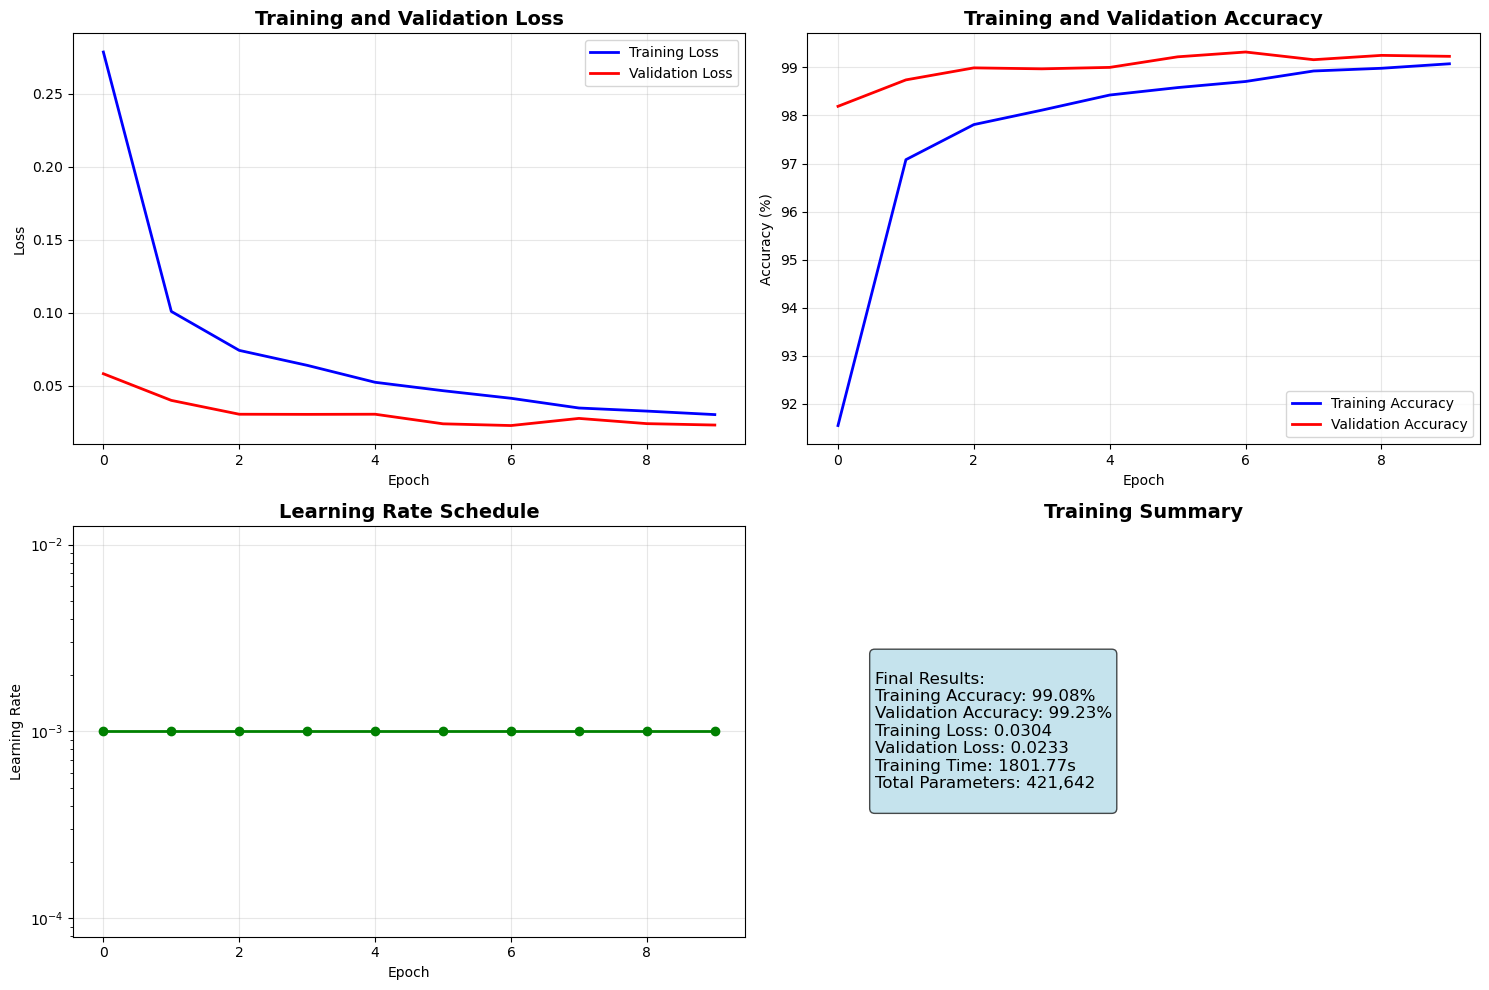

TRAINING RESULTS SUMMARY
Final Training Accuracy: 99.08%
Final Validation Accuracy: 99.23%
Best Validation Accuracy: 99.32%
Training Time: 1801.77 seconds
Total Parameters: 421,642
Parameters per Image: 7.0


In [19]:
# Create comprehensive training visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Training and Validation Loss
axes[0, 0].plot(train_losses, label='Training Loss', color='blue', linewidth=2)
axes[0, 0].plot(val_losses, label='Validation Loss', color='red', linewidth=2)
axes[0, 0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Training and Validation Accuracy
axes[0, 1].plot(train_accuracies, label='Training Accuracy', color='blue', linewidth=2)
axes[0, 1].plot(val_accuracies, label='Validation Accuracy', color='red', linewidth=2)
axes[0, 1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Learning Rate Schedule
axes[1, 0].plot(learning_rates, color='green', linewidth=2, marker='o')
axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Learning Rate')
axes[1, 0].set_yscale('log')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Final Performance Summary
epochs = range(1, len(train_accuracies) + 1)
final_train_acc = train_accuracies[-1]
final_val_acc = val_accuracies[-1]
final_train_loss = train_losses[-1]
final_val_loss = val_losses[-1]

summary_text = f"""
Final Results:
Training Accuracy: {final_train_acc:.2f}%
Validation Accuracy: {final_val_acc:.2f}%
Training Loss: {final_train_loss:.4f}
Validation Loss: {final_val_loss:.4f}
Training Time: {training_time:.2f}s
Total Parameters: {total_params:,}
"""

axes[1, 1].text(0.1, 0.5, summary_text, fontsize=12, verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
axes[1, 1].set_title('Training Summary', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print detailed results
print("=" * 60)
print("TRAINING RESULTS SUMMARY")
print("=" * 60)
print(f"Final Training Accuracy: {final_train_acc:.2f}%")
print(f"Final Validation Accuracy: {final_val_acc:.2f}%")
print(f"Best Validation Accuracy: {max(val_accuracies):.2f}%")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Total Parameters: {total_params:,}")
print(f"Parameters per Image: {total_params/len(train_dataset):.1f}")
print("=" * 60)


### 2.7 Model Evaluation and Confusion Matrix


Evaluating: 100%|██████████| 157/157 [00:27<00:00,  5.66it/s]


Overall Test Accuracy: 0.9923 (99.23%)


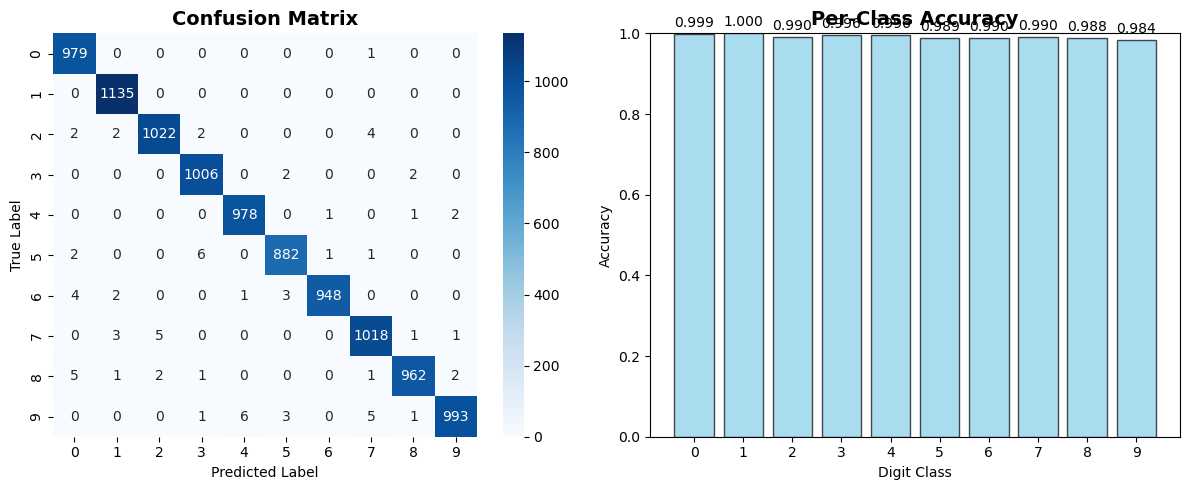


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


Misclassified samples: 77 out of 10000 (0.77%)


In [20]:
# Evaluate model on test set and create confusion matrix
def evaluate_model(model, test_loader, device):
    """Evaluate model and return predictions and true labels"""
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for data, target in tqdm(test_loader, desc="Evaluating"):
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
    
    return np.array(all_predictions), np.array(all_targets)

# Get predictions
predictions, true_labels = evaluate_model(model, test_loader, device)

# Calculate overall accuracy
overall_accuracy = accuracy_score(true_labels, predictions)
print(f"Overall Test Accuracy: {overall_accuracy:.4f} ({overall_accuracy*100:.2f}%)")

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Visualize confusion matrix
plt.figure(figsize=(12, 5))

# Plot 1: Confusion Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Plot 2: Per-class Accuracy
plt.subplot(1, 2, 2)
per_class_accuracy = cm.diagonal() / cm.sum(axis=1)
bars = plt.bar(range(10), per_class_accuracy, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Per-Class Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Digit Class')
plt.ylabel('Accuracy')
plt.xticks(range(10))
plt.ylim(0, 1)

# Add accuracy values on bars
for i, (bar, acc) in enumerate(zip(bars, per_class_accuracy)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(true_labels, predictions, target_names=[str(i) for i in range(10)]))

# Find misclassified examples
misclassified_indices = np.where(predictions != true_labels)[0]
print(f"\nMisclassified samples: {len(misclassified_indices)} out of {len(true_labels)} ({len(misclassified_indices)/len(true_labels)*100:.2f}%)")


### 2.8 Sample Predictions and Misclassification Analysis

Sample Predictions (Green=Correct, Red=Incorrect):


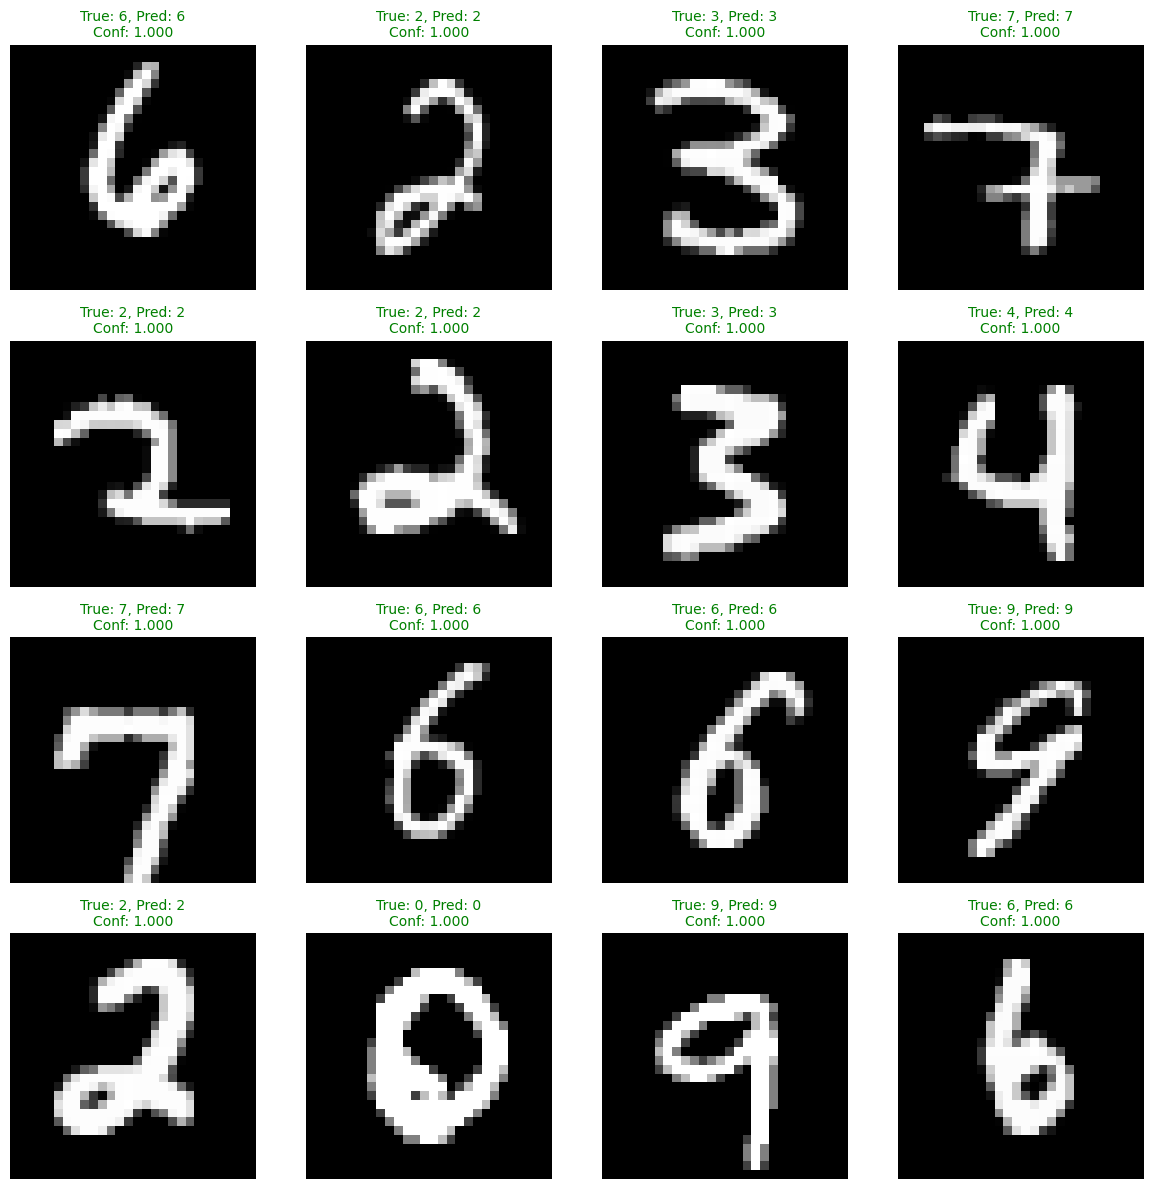


Analyzing 16 misclassified examples:


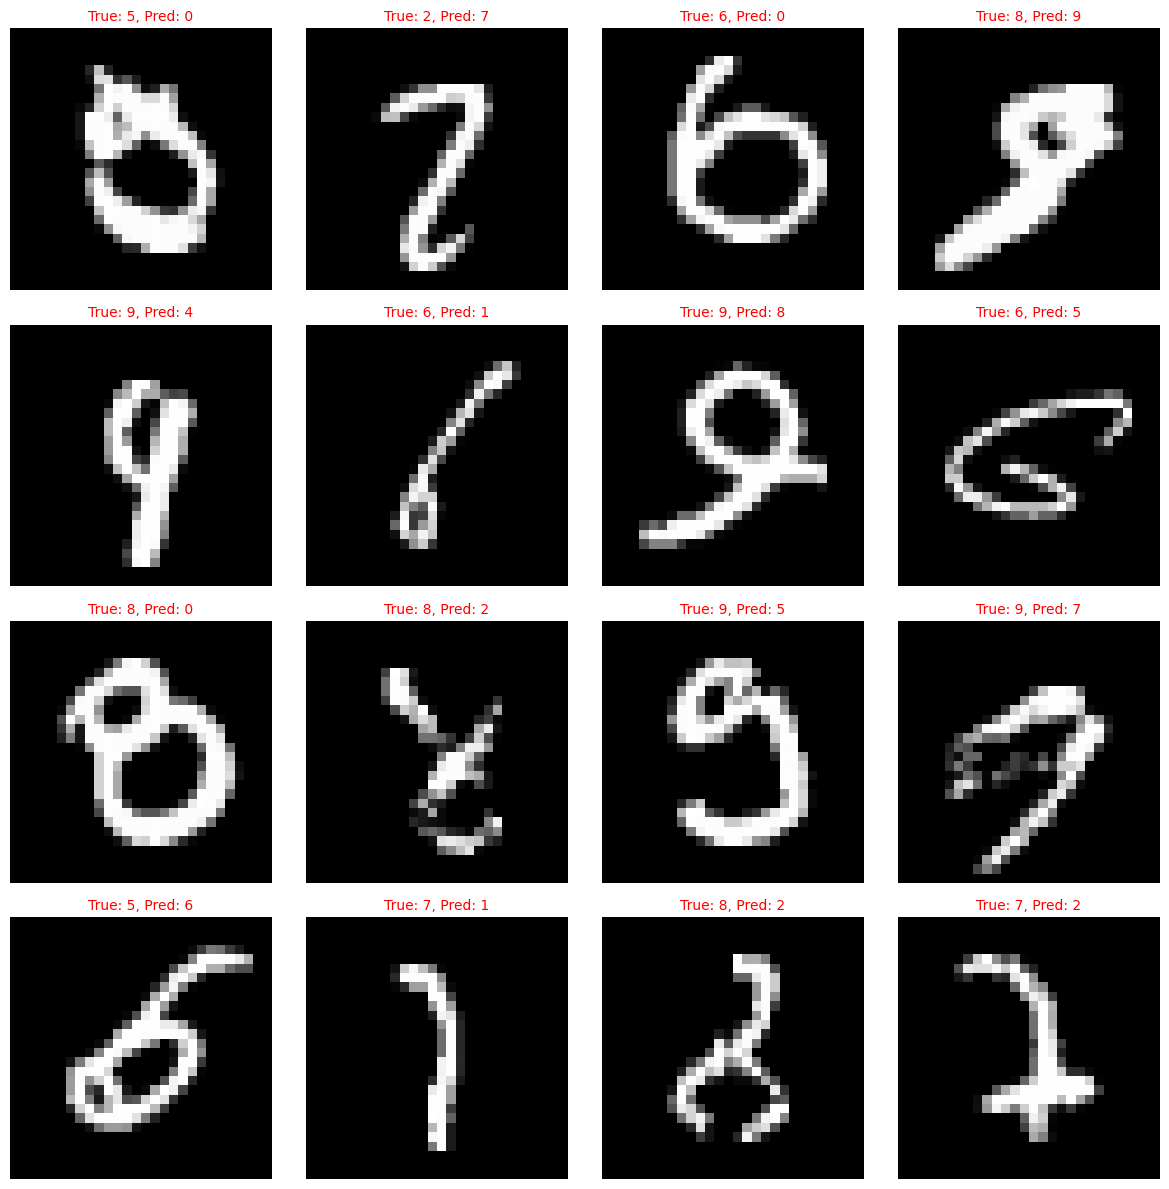


Common Misclassification Patterns:
True 5 → Predicted 3: 6 times
True 9 → Predicted 4: 6 times
True 8 → Predicted 0: 5 times
True 9 → Predicted 7: 5 times
True 7 → Predicted 2: 5 times


In [21]:
# Visualize sample predictions
def visualize_predictions(model, test_dataset, predictions, true_labels, num_samples=16):
    """Visualize sample predictions with confidence scores"""
    model.eval()
    
    # Get random sample of test data
    indices = np.random.choice(len(test_dataset), num_samples, replace=False)
    
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()
    
    with torch.no_grad():
        for i, idx in enumerate(indices):
            image, true_label = test_dataset[idx]
            image = image.unsqueeze(0).to(device)  # Add batch dimension
            
            # Get prediction and confidence
            output = model(image)
            probabilities = F.softmax(output, dim=1)
            predicted_label = output.argmax().item()
            confidence = probabilities[0][predicted_label].item()
            
            # Denormalize image for visualization
            image_display = image.squeeze().cpu() * 0.5 + 0.5
            
            # Plot image
            axes[i].imshow(image_display.squeeze(), cmap='gray')
            
            # Color code: green for correct, red for incorrect
            color = 'green' if predicted_label == true_label else 'red'
            axes[i].set_title(f'True: {true_label}, Pred: {predicted_label}\nConf: {confidence:.3f}', 
                            color=color, fontsize=10)
            axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize random sample predictions
print("Sample Predictions (Green=Correct, Red=Incorrect):")
visualize_predictions(model, test_dataset, predictions, true_labels)

# Analyze misclassified examples
if len(misclassified_indices) > 0:
    print(f"\nAnalyzing {min(16, len(misclassified_indices))} misclassified examples:")
    
    # Get sample of misclassified examples
    sample_misclassified = np.random.choice(misclassified_indices, 
                                           min(16, len(misclassified_indices)), 
                                           replace=False)
    
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()
    
    for i, idx in enumerate(sample_misclassified):
        image, true_label = test_dataset[idx]
        predicted_label = predictions[idx]
        
        # Denormalize image
        image_display = image * 0.5 + 0.5
        
        axes[i].imshow(image_display.squeeze(), cmap='gray')
        axes[i].set_title(f'True: {true_label}, Pred: {predicted_label}', 
                         color='red', fontsize=10)
        axes[i].axis('off')
    
    # Hide unused subplots
    for i in range(len(sample_misclassified), 16):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Analyze common misclassification patterns
    print("\nCommon Misclassification Patterns:")
    misclass_pairs = []
    for idx in misclassified_indices:
        true_label = true_labels[idx]
        pred_label = predictions[idx]
        misclass_pairs.append((true_label, pred_label))
    
    from collections import Counter
    common_mistakes = Counter(misclass_pairs).most_common(5)
    
    for (true_label, pred_label), count in common_mistakes:
        print(f"True {true_label} → Predicted {pred_label}: {count} times")
else:
    print("No misclassified examples found!")


---

## 3. Advanced CNN Architecture for CIFAR-10

Now let's tackle a more challenging dataset: CIFAR-10. This dataset contains 60,000 color images (32×32 pixels) of 10 different classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck.


Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:31<00:00, 5.35MB/s] 


CIFAR-10 Training samples: 50000
CIFAR-10 Test samples: 10000
Image shape: torch.Size([3, 32, 32])
Number of classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Sample images from CIFAR-10 training set:


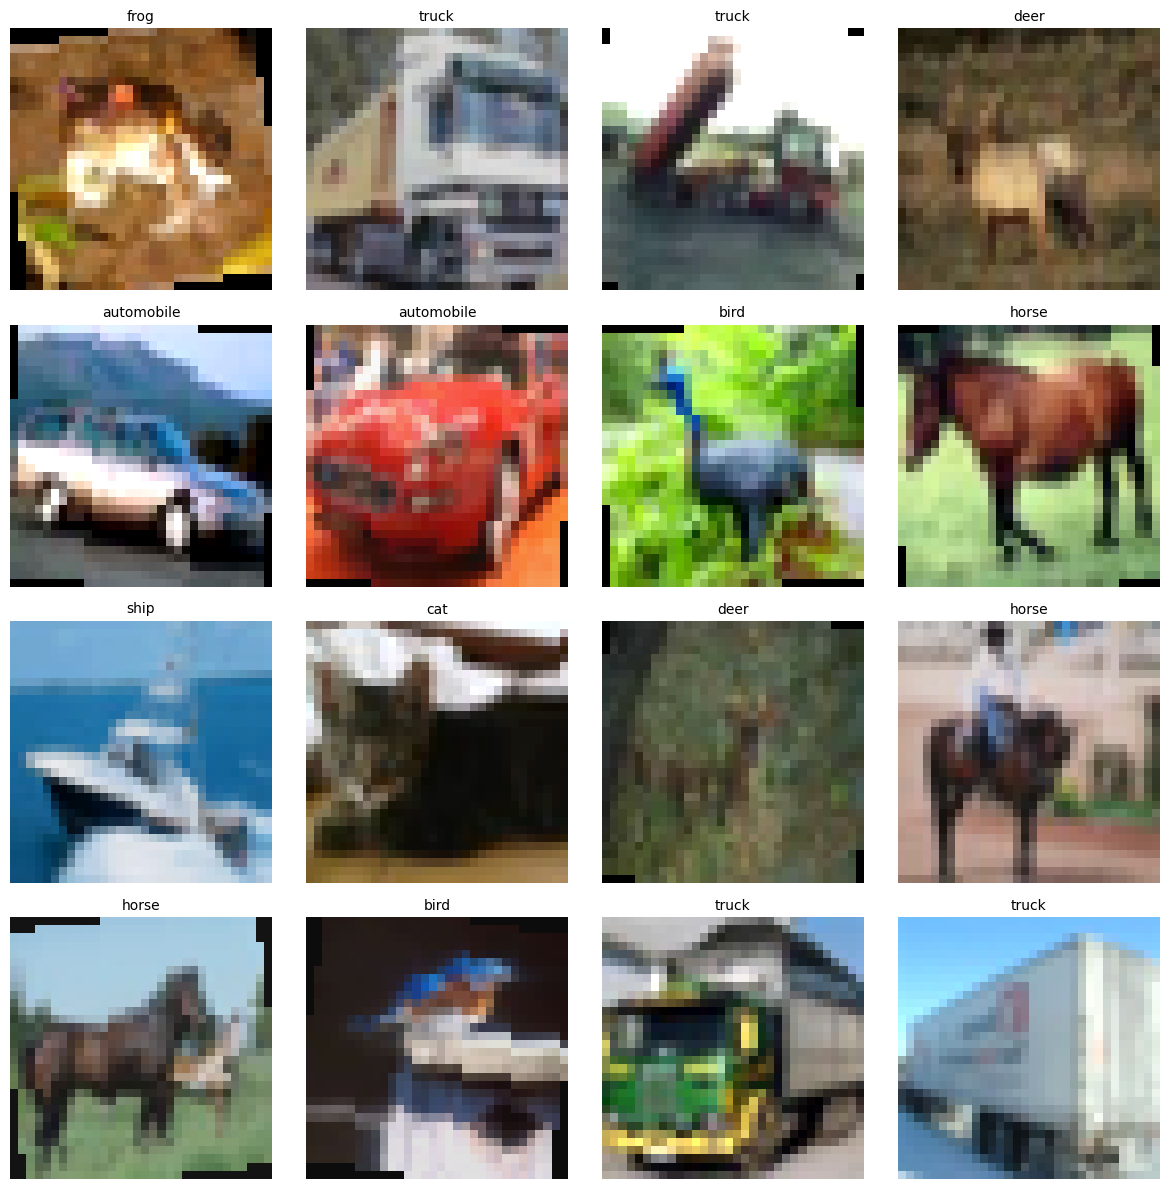

In [23]:
# Define data augmentation transforms for CIFAR-10
# Data augmentation helps prevent overfitting and improves generalization
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomRotation(10),  # Random rotation up to 10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2),  # Random color adjustments
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize RGB channels
])

# No augmentation for test set
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
cifar_train_dataset = datasets.CIFAR10(
    root='./data', 
    train=True, 
    download=True, 
    transform=train_transform
)

cifar_test_dataset = datasets.CIFAR10(
    root='./data', 
    train=False, 
    download=True, 
    transform=test_transform
)

# Create data loaders
cifar_batch_size = 128  # Larger batch size for CIFAR-10
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=cifar_batch_size, shuffle=True)
cifar_test_loader = DataLoader(cifar_test_dataset, batch_size=cifar_batch_size, shuffle=False)

print(f"CIFAR-10 Training samples: {len(cifar_train_dataset)}")
print(f"CIFAR-10 Test samples: {len(cifar_test_dataset)}")
print(f"Image shape: {cifar_train_dataset[0][0].shape}")
print(f"Number of classes: {len(cifar_train_dataset.classes)}")
print(f"Classes: {cifar_train_dataset.classes}")

# Visualize CIFAR-10 samples
def visualize_cifar_samples(dataset, num_samples=16):
    """Visualize sample images from CIFAR-10 dataset"""
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    axes = axes.ravel()
    
    for i in range(num_samples):
        image, label = dataset[i]
        # Denormalize image for visualization
        image = image * 0.5 + 0.5  # Convert from [-1,1] back to [0,1]
        
        # Convert tensor to numpy and transpose for matplotlib
        image_np = image.permute(1, 2, 0).numpy()
        
        axes[i].imshow(image_np)
        axes[i].set_title(f'{dataset.classes[label]}', fontsize=10)
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\nSample images from CIFAR-10 training set:")
visualize_cifar_samples(cifar_train_dataset)


### 3.2 Advanced CNN Architecture with Modern Techniques


In [24]:
class AdvancedCNN(nn.Module):
    """
    Advanced CNN architecture for CIFAR-10 classification.
    Features: Batch Normalization, Dropout, Residual Connections, Modern Architecture
    """
    
    def __init__(self, num_classes=10):
        super(AdvancedCNN, self).__init__()
        
        # First convolutional block with batch normalization
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)  # 3 channels for RGB
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(2, 2)  # 32x32 → 16x16
        self.dropout1 = nn.Dropout2d(0.25)
        
        # Second convolutional block
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(2, 2)  # 16x16 → 8x8
        self.dropout2 = nn.Dropout2d(0.25)
        
        # Third convolutional block
        self.conv5 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.bn6 = nn.BatchNorm2d(256)
        self.pool3 = nn.MaxPool2d(2, 2)  # 8x8 → 4x4
        self.dropout3 = nn.Dropout2d(0.25)
        
        # Global Average Pooling instead of fully connected layers
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)  # 4x4 → 1x1
        
        # Final classification layers
        self.fc1 = nn.Linear(256, 512)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, num_classes)
        
    def forward(self, x):
        """Forward pass through the advanced CNN"""
        # First block: 3x32x32 → 64x16x16
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool1(x)
        x = self.dropout1(x)
        
        # Second block: 64x16x16 → 128x8x8
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        # Third block: 128x8x8 → 256x4x4
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool3(x)
        x = self.dropout3(x)
        
        # Global average pooling: 256x4x4 → 256x1x1
        x = self.global_avg_pool(x)
        x = x.view(x.size(0), -1)  # Flatten: 256x1x1 → 256
        
        # Final classification: 256 → 512 → 10
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)
        x = self.fc2(x)
        
        return x

# Create advanced model
advanced_model = AdvancedCNN(num_classes=10).to(device)

# Print model architecture
print("Advanced CNN Architecture:")
print(advanced_model)

# Count parameters
total_params = sum(p.numel() for p in advanced_model.parameters())
trainable_params = sum(p.numel() for p in advanced_model.parameters() if p.requires_grad)
print(f"\nTotal parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Compare with simple CNN
simple_params = sum(p.numel() for p in model.parameters())
print(f"Simple CNN parameters: {simple_params:,}")
print(f"Parameter increase: {total_params/simple_params:.1f}x")


Advanced CNN Architecture:
AdvancedCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.25, inplace=False)
  (conv5): Conv2d(128, 256

### 3.3 Training the Advanced CNN on CIFAR-10


In [26]:
# Setup training for advanced CNN
cifar_criterion = nn.CrossEntropyLoss()
cifar_optimizer = optim.Adam(advanced_model.parameters(), lr=0.001, weight_decay=1e-4)
cifar_scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    cifar_optimizer, mode='min', factor=0.5, patience=3
)

# Training configuration
cifar_epochs = 20  # More epochs for CIFAR-10

# Initialize training history
cifar_train_losses = []
cifar_train_accuracies = []
cifar_val_losses = []
cifar_val_accuracies = []
cifar_learning_rates = []

print("Starting CIFAR-10 training...")
print(f"Model: Advanced CNN with {total_params:,} parameters")
print(f"Epochs: {cifar_epochs}")
print(f"Batch size: {cifar_batch_size}")
print(f"Learning rate: {cifar_optimizer.param_groups[0]['lr']}")

start_time = time.time()

for epoch in range(cifar_epochs):
    print(f"\nEpoch {epoch+1}/{cifar_epochs}")
    print("-" * 50)
    
    # Train
    train_loss, train_acc = train_epoch(advanced_model, cifar_train_loader, cifar_criterion, cifar_optimizer, device)
    
    # Validate
    val_loss, val_acc = validate_epoch(advanced_model, cifar_test_loader, cifar_criterion, device)
    
    # Learning rate scheduling
    cifar_scheduler.step(val_loss)
    
    # Store metrics
    cifar_train_losses.append(train_loss)
    cifar_train_accuracies.append(train_acc)
    cifar_val_losses.append(val_loss)
    cifar_val_accuracies.append(val_acc)
    cifar_learning_rates.append(cifar_optimizer.param_groups[0]['lr'])
    
    # Print epoch results
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    print(f"Learning Rate: {cifar_optimizer.param_groups[0]['lr']:.6f}")

cifar_training_time = time.time() - start_time
print(f"\nCIFAR-10 training completed in {cifar_training_time:.2f} seconds")
print(f"Final validation accuracy: {cifar_val_accuracies[-1]:.2f}%")
print(f"Best validation accuracy: {max(cifar_val_accuracies):.2f}%")


Starting CIFAR-10 training...
Model: Advanced CNN with 1,283,914 parameters
Epochs: 20
Batch size: 128
Learning rate: 0.001

Epoch 1/20
--------------------------------------------------


Train Loss: 1.6781, Train Acc: 36.73%
Val Loss: 1.2852, Val Acc: 52.32%
Learning Rate: 0.001000

Epoch 2/20
--------------------------------------------------


Train Loss: 1.3378, Train Acc: 50.87%
Val Loss: 1.0988, Val Acc: 60.94%
Learning Rate: 0.001000

Epoch 3/20
--------------------------------------------------


Train Loss: 1.1774, Train Acc: 57.68%
Val Loss: 0.9636, Val Acc: 65.29%
Learning Rate: 0.001000

Epoch 4/20
--------------------------------------------------


Train Loss: 1.0685, Train Acc: 61.90%
Val Loss: 0.8561, Val Acc: 69.54%
Learning Rate: 0.001000

Epoch 5/20
--------------------------------------------------


Train Loss: 0.9862, Train Acc: 65.04%
Val Loss: 0.7774, Val Acc: 72.00%
Learning Rate: 0.001000

Epoch 6/20
--------------------------------------------------


Train Loss: 0.9195, Train Acc: 67.78%
Val Loss: 0.7532, Val Acc: 73.32%
Learning Rate: 0.001000

Epoch 7/20
--------------------------------------------------


Train Loss: 0.8534, Train Acc: 70.10%
Val Loss: 0.6632, Val Acc: 76.40%
Learning Rate: 0.001000

Epoch 8/20
--------------------------------------------------


Train Loss: 0.8107, Train Acc: 71.72%
Val Loss: 0.6206, Val Acc: 78.40%
Learning Rate: 0.001000

Epoch 9/20
--------------------------------------------------


Train Loss: 0.7695, Train Acc: 73.32%
Val Loss: 0.5709, Val Acc: 80.27%
Learning Rate: 0.001000

Epoch 10/20
--------------------------------------------------


Train Loss: 0.7294, Train Acc: 74.82%
Val Loss: 0.5608, Val Acc: 81.09%
Learning Rate: 0.001000

Epoch 11/20
--------------------------------------------------


Train Loss: 0.6981, Train Acc: 75.80%
Val Loss: 0.5984, Val Acc: 79.41%
Learning Rate: 0.001000

Epoch 12/20
--------------------------------------------------


Train Loss: 0.6677, Train Acc: 77.23%
Val Loss: 0.5314, Val Acc: 81.85%
Learning Rate: 0.001000

Epoch 13/20
--------------------------------------------------


Train Loss: 0.6409, Train Acc: 78.03%
Val Loss: 0.4787, Val Acc: 83.64%
Learning Rate: 0.001000

Epoch 14/20
--------------------------------------------------


Train Loss: 0.6211, Train Acc: 78.75%
Val Loss: 0.4762, Val Acc: 84.01%
Learning Rate: 0.001000

Epoch 15/20
--------------------------------------------------


Train Loss: 0.5994, Train Acc: 79.57%
Val Loss: 0.4610, Val Acc: 84.06%
Learning Rate: 0.001000

Epoch 16/20
--------------------------------------------------


Train Loss: 0.5845, Train Acc: 80.00%
Val Loss: 0.4490, Val Acc: 84.72%
Learning Rate: 0.001000

Epoch 17/20
--------------------------------------------------


Train Loss: 0.5640, Train Acc: 80.87%
Val Loss: 0.4177, Val Acc: 85.75%
Learning Rate: 0.001000

Epoch 18/20
--------------------------------------------------


Train Loss: 0.5528, Train Acc: 81.42%
Val Loss: 0.4324, Val Acc: 85.33%
Learning Rate: 0.001000

Epoch 19/20
--------------------------------------------------


Train Loss: 0.5351, Train Acc: 81.70%
Val Loss: 0.4291, Val Acc: 85.09%
Learning Rate: 0.001000

Epoch 20/20
--------------------------------------------------


Train Loss: 0.5232, Train Acc: 81.95%
Val Loss: 0.4127, Val Acc: 86.05%
Learning Rate: 0.001000

CIFAR-10 training completed in 22229.94 seconds
Final validation accuracy: 86.05%
Best validation accuracy: 86.05%


---

## 4. Hands-on Exercises: CNN Mastery

Now it's your turn to experiment and deepen your understanding! These exercises will help you master CNN concepts through practical implementation.


### Exercise 1: Architecture Experimentation

**Task**: Modify the CNN architecture and observe the impact on performance.

**Progressive Hints:**
- **Level 1**: Change the number of filters in conv layers (try 16, 32, 64, 128)
- **Level 2**: Add more convolutional layers (3rd, 4th conv block)
- **Level 3**: Experiment with different kernel sizes (3x3 vs 5x5)
- **Level 4**: Try different pooling strategies (max vs average pooling)

**Advanced Requirements:**
- Compare training time vs accuracy trade-offs
- Analyze parameter count vs performance relationship
- Visualize the impact on feature maps


In [ ]:
# TODO: Exercise 1 - Architecture Experimentation
print("=== Exercise 1: Architecture Experimentation ===")

# TODO: Level 1 - Create different filter configurations
def create_cnn_variant(filters_config, name):
    """
    Create CNN with different filter configurations
    filters_config: list of filter counts for each conv layer
    """
    class CustomCNN(nn.Module):
        def __init__(self, num_classes=10):
            super(CustomCNN, self).__init__()
            
            # TODO: Implement dynamic architecture based on filters_config
            # Use filters_config to determine number of filters in each layer
            # Example: filters_config = [32, 64] for 2 conv layers
            
            pass
        
        def forward(self, x):
            # TODO: Implement forward pass
            pass
    
    return CustomCNN

# TODO: Level 2 - Test different architectures
architectures = {
    'Small': [16, 32],      # Fewer parameters
    'Medium': [32, 64],     # Original
    'Large': [64, 128],     # More parameters
    'Extra_Large': [128, 256]  # Many parameters
}

# TODO: Level 3 - Train and compare architectures
results = {}

for name, filters in architectures.items():
    print(f"\nTesting {name} architecture with filters: {filters}")
    
    # TODO: Create model
    # model = create_cnn_variant(filters, name)().to(device)
    
    # TODO: Train model (use fewer epochs for quick testing)
    # train_loss, train_acc = train_model(model, epochs=5)
    
    # TODO: Store results
    # results[name] = {'filters': filters, 'accuracy': train_acc, 'params': count_params(model)}
    
    print(f"TODO: Implement {name} architecture testing")

# TODO: Level 4 - Visualize results
# Create comparison plots showing:
# - Accuracy vs Parameter count
# - Training time vs Accuracy
# - Architecture complexity vs Performance

print("\nExercise 1: Architecture experimentation framework ready!")
print("Implement the TODO sections to complete the exercise.")


### Exercise 2: Data Augmentation Impact Analysis

**Task**: Implement different data augmentation strategies and measure their impact on model performance.

**Progressive Hints:**
- **Level 1**: Compare no augmentation vs basic augmentation (horizontal flip)
- **Level 2**: Add rotation and color jittering
- **Level 3**: Implement advanced augmentations (cutout, mixup)
- **Level 4**: Analyze overfitting reduction and generalization improvement

**Advanced Requirements:**
- Measure training vs validation accuracy gap
- Visualize augmented samples
- Compare training curves with/without augmentation


In [28]:
# TODO: Exercise 2 - Data Augmentation Impact Analysis
print("=== Exercise 2: Data Augmentation Impact Analysis ===")

# TODO: Level 1 - Define different augmentation strategies
augmentation_strategies = {
    'No_Augmentation': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'Basic_Augmentation': transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'Moderate_Augmentation': transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(15),
        transforms.ColorJitter(brightness=0.3, contrast=0.3),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    
    'Heavy_Augmentation': transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(20),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4),
        transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
}

# TODO: Level 2 - Visualize augmented samples
def visualize_augmentations(dataset, transform, num_samples=8):
    """Visualize how different augmentations affect the same image"""
    # TODO: Implement augmentation visualization
    # Show original image and several augmented versions
    pass

# TODO: Level 3 - Train models with different augmentations
augmentation_results = {}

for strategy_name, transform in augmentation_strategies.items():
    print(f"\nTesting {strategy_name}...")
    
    # TODO: Create datasets with different augmentations
    # train_dataset_aug = datasets.CIFAR10(..., transform=transform)
    # train_loader_aug = DataLoader(train_dataset_aug, ...)
    
    # TODO: Train model with this augmentation strategy
    # model_aug = SimpleCNN().to(device)
    # train_loss, train_acc, val_loss, val_acc = train_model(model_aug, train_loader_aug, epochs=10)
    
    # TODO: Store results
    # augmentation_results[strategy_name] = {
    #     'train_acc': train_acc,
    #     'val_acc': val_acc,
    #     'overfitting_gap': train_acc - val_acc
    # }
    
    print(f"TODO: Implement {strategy_name} testing")

# TODO: Level 4 - Analyze and visualize results
# Create plots showing:
# - Training accuracy vs Validation accuracy for each strategy
# - Overfitting gap comparison
# - Sample augmented images

print("\nExercise 2: Data augmentation analysis framework ready!")
print("Implement the TODO sections to complete the exercise.")


=== Exercise 2: Data Augmentation Impact Analysis ===

Testing No_Augmentation...
TODO: Implement No_Augmentation testing

Testing Basic_Augmentation...
TODO: Implement Basic_Augmentation testing

Testing Moderate_Augmentation...
TODO: Implement Moderate_Augmentation testing

Testing Heavy_Augmentation...
TODO: Implement Heavy_Augmentation testing

Exercise 2: Data augmentation analysis framework ready!
Implement the TODO sections to complete the exercise.


### Exercise 3: Custom Dataset Challenge

**Task**: Apply your CNN knowledge to a new dataset - Fashion-MNIST.

**Challenge Requirements:**
- Load Fashion-MNIST dataset (10 classes of clothing items)
- Build a custom CNN architecture optimized for this dataset
- Achieve at least 85% accuracy on the test set
- Compare performance with different architectures
- Analyze which clothing items are most/least accurately classified

**Bonus Points:**
- Implement transfer learning from MNIST-trained model
- Create a confusion matrix analysis
- Visualize learned features and filters


In [ ]:
# TODO: Exercise 3 - Custom Dataset Challenge (Fashion-MNIST)
print("=== Exercise 3: Fashion-MNIST Challenge ===")

# TODO: Level 1 - Load Fashion-MNIST dataset
# fashion_train = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
# fashion_test = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Fashion-MNIST classes
fashion_classes = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

print("Fashion-MNIST Classes:")
for i, class_name in enumerate(fashion_classes):
    print(f"{i}: {class_name}")

# TODO: Level 2 - Design custom CNN for Fashion-MNIST
class FashionCNN(nn.Module):
    """Custom CNN optimized for Fashion-MNIST"""
    def __init__(self, num_classes=10):
        super(FashionCNN, self).__init__()
        
        # TODO: Design architecture specifically for Fashion-MNIST
        # Consider: clothing items have different characteristics than digits
        # - More complex textures and patterns
        # - Different spatial relationships
        # - May need more filters or different kernel sizes
        
        pass
    
    def forward(self, x):
        # TODO: Implement forward pass
        pass

# TODO: Level 3 - Train and evaluate model
def train_fashion_model():
    """Train Fashion-MNIST model and return results"""
    # TODO: Create model, optimizer, and training loop
    # TODO: Implement early stopping to prevent overfitting
    # TODO: Track training progress and return final accuracy
    pass

# TODO: Level 4 - Transfer learning experiment
def transfer_learning_experiment():
    """Use MNIST-trained model as starting point for Fashion-MNIST"""
    # TODO: Load pre-trained MNIST model
    # TODO: Modify final layer for 10 Fashion-MNIST classes
    # TODO: Fine-tune on Fashion-MNIST dataset
    # TODO: Compare with training from scratch
    pass

# TODO: Level 5 - Analysis and visualization
def analyze_fashion_results():
    """Analyze Fashion-MNIST classification results"""
    # TODO: Create confusion matrix
    # TODO: Identify most/least accurately classified items
    # TODO: Visualize misclassified examples
    # TODO: Analyze which features the model learned
    pass

print("\nExercise 3: Fashion-MNIST challenge framework ready!")
print("Implement the TODO sections to complete the challenge.")
print("Target: Achieve 85%+ accuracy on Fashion-MNIST test set!")


---

## 5. Key Takeaways and Industry Insights

### Core Concepts Mastered

**CNN Architecture Fundamentals:**
1. **Convolutional Layers**: Learn spatial features through shared filters
2. **Pooling Layers**: Reduce dimensionality while preserving important information
3. **Activation Functions**: Introduce non-linearity (ReLU dominates modern architectures)
4. **Fully Connected Layers**: Final classification based on learned features
5. **Batch Normalization**: Stabilize training and enable higher learning rates
6. **Dropout**: Prevent overfitting through random neuron deactivation

**Training Best Practices:**
1. **Data Preprocessing**: Normalization and augmentation are crucial
2. **Learning Rate Scheduling**: Adaptive learning rates improve convergence
3. **Early Stopping**: Prevent overfitting by monitoring validation loss
4. **Gradient Clipping**: Prevent exploding gradients in deep networks
5. **Model Checkpointing**: Save progress for resuming training

**Architecture Design Principles:**
1. **Start Simple**: Begin with basic architectures and add complexity gradually
2. **Parameter Efficiency**: More parameters ≠ better performance
3. **Feature Hierarchy**: Early layers detect edges, later layers detect objects
4. **Spatial Invariance**: Pooling provides translation robustness
5. **Channel Growth**: Gradually increase filter count through network depth
